## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [1]:
# task 1 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#task 2
movie_data = pd.read_csv('tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [2]:
# task 1
print(movie_data.shape)

# task 2
movie_data.head(5)
movie_data.tail(5)
movie_data.sample(5)

#task 3
movie_data.dtypes

#task 4
movie_data.isnull().any()
movie_data.isnull().sum()

#task 5
movie_data.describe()


(10866, 21)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [3]:
movie_data = movie_data.fillna(method = 'ffill', axis = 0)
movie_data.isnull().sum().sum()

0

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [4]:
# task 1
movie_data[['id','popularity','budget', 'runtime', 'vote_average']]

#task 2
movie_data.loc[list(range(20)) + list([47, 48])]

#task 3
movie_data[49:60]['popularity'];


---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [5]:
#task 1
movie_data[movie_data['popularity'] > 5]

#task 2 
movie_data[(movie_data['popularity'] > 5) & (movie_data['release_year'] > 1996)];

---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [6]:
#task 1
movie_data.groupby('release_year').revenue.agg('mean').sort_values(ascending = False)

#task 2
movie_data.groupby('director').popularity.agg('mean').sort_values(ascending = False);

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

Text(0.5,1,'Top 20 Movies by Popularity ')

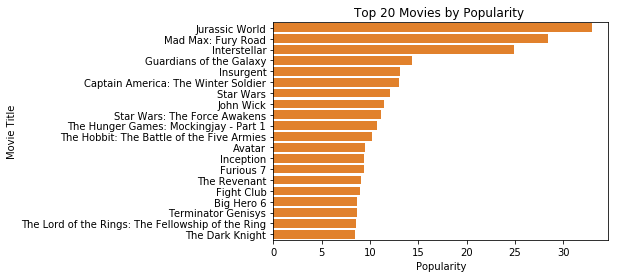

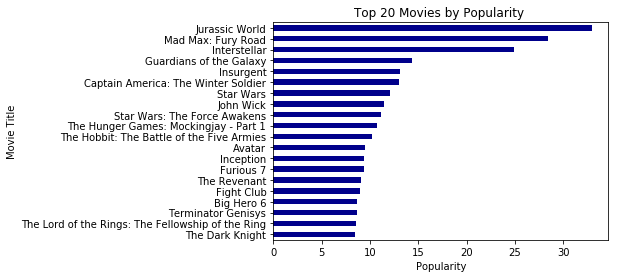

In [7]:
# get top20 popularity movie index
popupar20 = movie_data['popularity'].sort_values(ascending = False).index[0:20] 
# get a sub DataFrame of the top20 popularity movies
movie_popular20 = movie_data.loc[popupar20]

# draw a barplot to represent each movie's popularity
base_color = sb.color_palette()[1]
sb.barplot(data = movie_popular20, y = 'original_title', x = 'popularity', color = base_color)
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Popularity ')

# using pandas visulization
plt.figure();
movie_popular20.set_index(['original_title'])['popularity'].sort_values().plot(kind = 'barh', color = 'DarkBlue')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Popularity ')

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

'\n分析：\n0. 图形中误差条很长，说明不同电影得表现差异很大\n1. 1960~1972年间，平均利润较低 （1e7左右）\n2. 1960~1990年间，平均利润基本保持上升趋势，1977年平均利润最高达到（3.5e7）\n3. 1990~2015年间，平均利润基本平稳（2e7~3e7之间）\n'

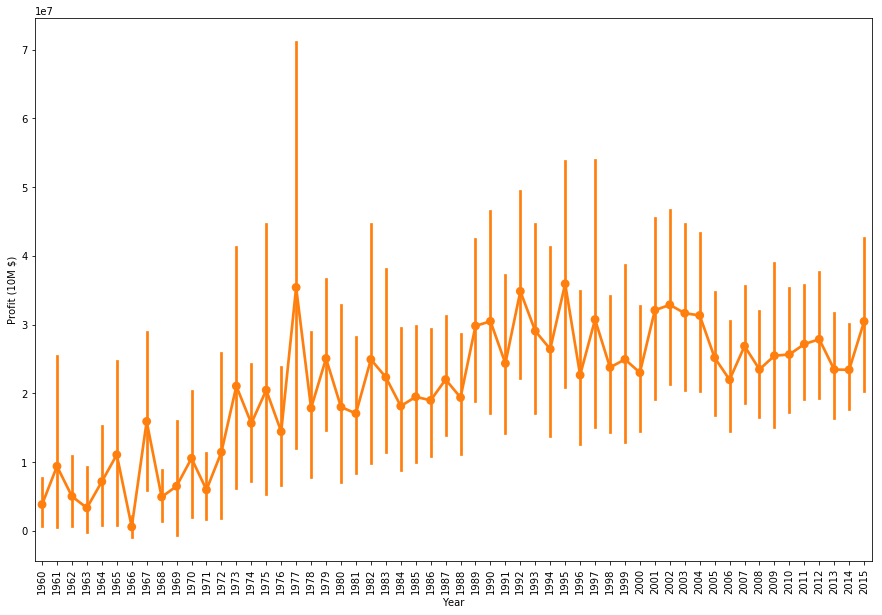

In [8]:
#给数据集中添加profit列
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

#选择Pointplot, x轴为年份， y轴为利润的
plt.figure(figsize = [15,10])
sb.pointplot(data = movie_data, x = 'release_year', y = 'profit', color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Profit (10M $)')


'''
分析：
0. 图形中误差条很长，说明不同电影得表现差异很大
1. 1960~1972年间，平均利润较低 （1e7左右）
2. 1960~1990年间，平均利润基本保持上升趋势，1977年平均利润最高达到（3.5e7）
3. 1990~2015年间，平均利润基本平稳（2e7~3e7之间）
'''

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

'\n分析：\n0. Steven Spielberg top3 表现都很不错\n1. Tim Burton top1 票房最好\n2. 最高产的 Woody Allen top3综合表现最差\n'

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


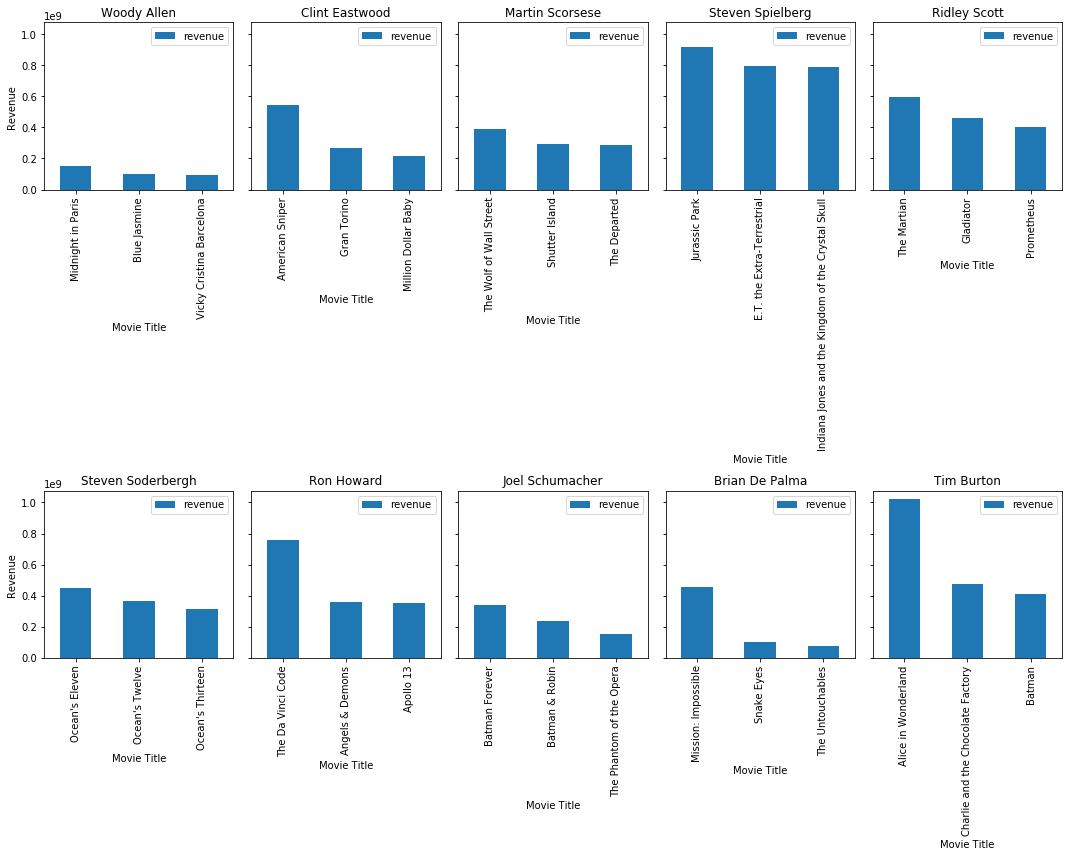

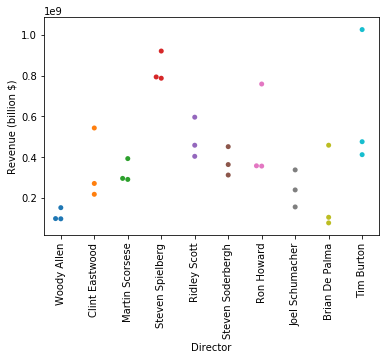

In [9]:
# process movies with multiple directors
tmp = movie_data['director'].str.split('|',expand = True).stack().reset_index(level = 1, drop = True).rename('director')

#produce a new dataframe having splitted director with interested columns
movie_director_split = movie_data[['original_title', 'revenue']].join(tmp)

# list of top10 directors who produce most films in descending order
director_top10 = tmp.value_counts().nlargest(10).index

movie_top10dir_sub = movie_director_split.loc[movie_director_split['director'].isin(director_top10)]

# creat a list of revenue top 3 movies of top10 directors
top3_list = []
for direc in director_top10:
    idx_list = movie_top10dir_sub[movie_top10dir_sub['director'] == direc].revenue.sort_values(ascending = False).index[0:3]
    top3_list.extend(idx_list)

# use the above list to produce a sub dataframe containing only 30 movies which we are interested in
movie_top30_sub = movie_top10dir_sub.loc[top3_list]
movie_top30_sub = movie_top30_sub.set_index('original_title')

# draw separated plots of each director
_, axes = plt.subplots(ncols = 5, nrows = 2, figsize=(15, 12), sharey=True, tight_layout = True)
for direct, ax in zip(director_top10, axes.flat):
    movie_top30_sub[movie_top30_sub['director'] == direct].plot(kind = 'bar', ax = ax)
    ax.set_title(direct)
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Movie Title')

# draw another swarm plot to represent all
plt.figure();
sb.swarmplot(data = movie_top30_sub, x = 'director', y = 'revenue')
plt.ylabel('Revenue (billion $)')
plt.xlabel('Director')
plt.xticks(rotation =90)


'''
分析：
0. Steven Spielberg top3 表现都很不错
1. Tim Burton top1 票房最好
2. 最高产的 Woody Allen top3综合表现最差
'''

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

'\n分析：\n0. 1968-1984 6月电影数量成上升趋势\n1. 1985-2001 6月电影数量比较平均\n2. 2002-2015 6月电影成爆发性增长趋势\n'

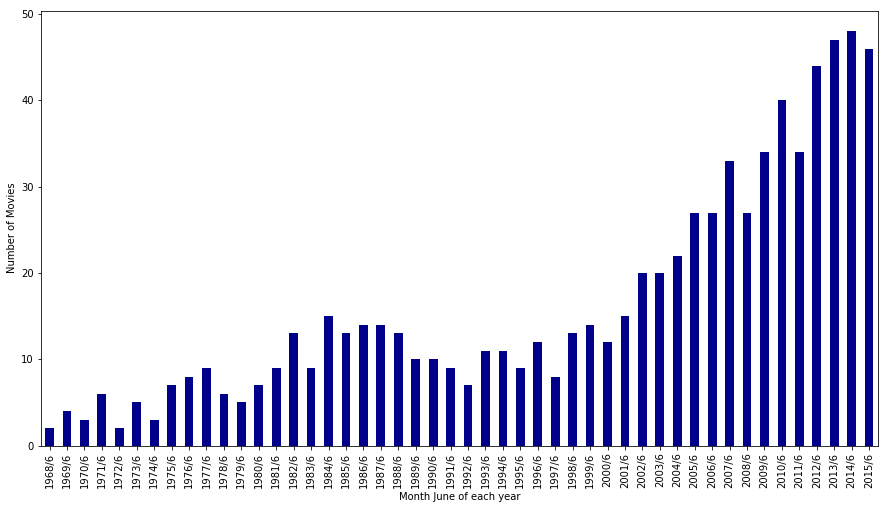

In [10]:
# condition of year
sel_y = (movie_data['release_year'] >= 1968) & (movie_data['release_year'] <= 2015)

# creat new column of month
month_list = []
for idx in range(movie_data.shape[0]):
    item_sep = movie_data['release_date'][idx].split('/')
    month = item_sep[0]
    month_list.append(month)

movie_data['month'] = month_list

# condition of month
sel_m = movie_data['month'] == '6'

# draw
movie_data[sel_y & sel_m]['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 8), color = 'DarkBlue')
plt.xlabel('Month June of each year')
plt.ylabel('Number of Movies')

# convert label to Year/Month format
loc, label = plt.xticks()

for each_label in label:
    each_label.set_text(each_label.get_text() + '/6')

plt.xticks(loc, label);

'''
分析：
0. 1968-1984 6月电影数量成上升趋势
1. 1985-2001 6月电影数量比较平均
2. 2002-2015 6月电影成爆发性增长趋势
'''

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'\n分析：\n0. 整体上两种类型电影都是上升趋势\n1. 1986-1974年Drama多于Comedy\n2. 1975-1988年， 2000-2009 年Comedy迎来高增长，数量远大于Drama\n3. 1989-1999年，2013-2015年两类电影数量相差不大\n'

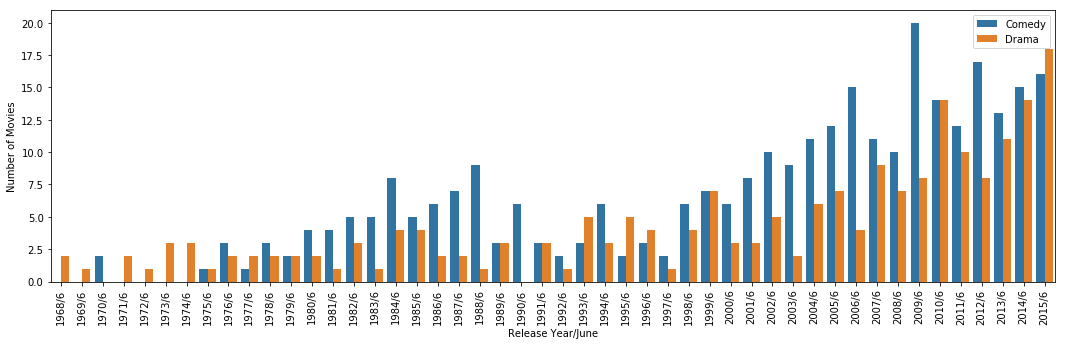

In [11]:
pd.set_option('display.max_columns', 50)


#prepare a list to produce a new column 'genres_adj' which has four categories: Comedy, Drama, Comedy&Drama, Non C&D
genres_CD_list = []
for idx in range(movie_data.shape[0]):
    content = movie_data['genres'][idx]
    if content.find('Comedy') != -1:
        content_adj = 'Comedy'
    elif content.find('Drama') != -1:
        content_adj = 'Drama'
    elif content.find('Comedy') & content.find('Drama') != -1:
        content_adj = 'Comedy&Drama'
    else:
        content_adj = 'Non C&D'
    genres_CD_list.append(content_adj)

# add column 'genres_adj' to dataset
movie_data['genres_adj'] = genres_CD_list

# get sub dataframe by filtering year and month
movie_YandM_sub = movie_data[sel_y & sel_m]

# order by ascending natural year
new_order_h2 = movie_YandM_sub.groupby(['release_year']).size().index
type2 = pd.api.types.CategoricalDtype(ordered = True, categories = new_order_h2)
movie_YandM_sub['release_year'] = movie_YandM_sub['release_year'].astype(type2)

# get only 'Comedy' and 'Drama' in movie_data['genres_adj']
new_order_CD = ['Comedy', 'Drama']
CD_type = pd.api.types.CategoricalDtype(ordered = True, categories = new_order_CD)
movie_YandM_sub['genres_adj'] = movie_YandM_sub['genres_adj'].astype(CD_type)


#visulize via countplot (clustered bar chart)
plt.figure(figsize = [18, 5])
ax = sb.countplot(data = movie_YandM_sub, x = 'release_year', hue = 'genres_adj')
ax.legend(title = '')
plt.xticks(rotation = 90)
plt.xlabel('Release Year/June')
plt.ylabel('Number of Movies')

# convert label to Year/Month format
loc, label = plt.xticks()

for each_label in label:
    each_label.set_text(each_label.get_text() + '/6')

plt.xticks(loc, label);

'''
分析：
0. 整体上两种类型电影都是上升趋势
1. 1986-1974年Drama多于Comedy
2. 1975-1988年， 2000-2009 年Comedy迎来高增长，数量远大于Drama
3. 1989-1999年，2013-2015年两类电影数量相差不大
'''

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。